<a href="https://colab.research.google.com/github/Sauravacker/STOCKS-BACKTESTING-STRATEGY/blob/main/Algorithmic_trading_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libs
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Loading the trading data
from google.colab import files
uploaded=files.upload()


Saving AAPL.csv to AAPL.csv


In [ ]:
#storing the data
AAPL=pd.read_csv('AAPL.csv')
#showing the data
AAPL


,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-02-10,2.327857,2.416786,2.246429,2.403929,2.052551,1760477600
1,2006-02-13,2.379643,2.383929,2.308571,2.311071,1.973266,883498000
2,2006-02-14,2.325000,2.432143,2.321429,2.415714,2.062614,1160938800
3,2006-02-15,2.398571,2.486429,2.383929,2.472143,2.110794,1159771200
4,2006-02-16,2.496786,2.536071,2.481429,2.520357,2.151961,948175200
...,...,...,...,...,...,...,...
1474,2011-12-16,13.584286,13.719643,13.556071,13.607857,11.618826,421478400
1475,2011-12-19,13.659643,13.744643,13.588571,13.650357,11.655111,235530400
1476,2011-12-20,13.848571,14.146429,13.830714,14.141071,12.074098,337215200
1477,2011-12-21,14.167500,14.189286,14.000357,14.158929,12.089346,262948000


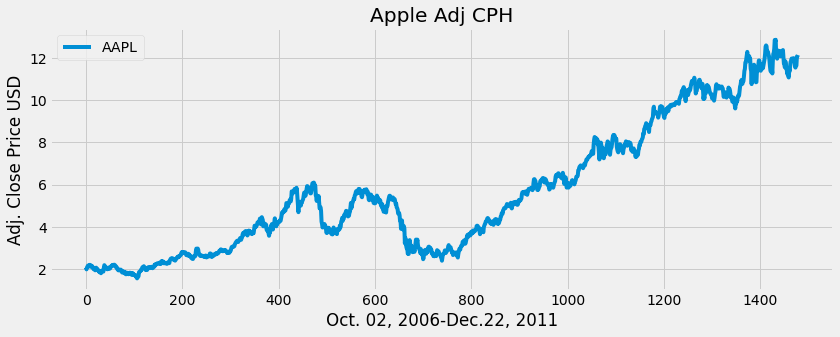

In [ ]:
#Visualising the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'],label='AAPL')
plt.title('Apple Adj CPH')
plt.xlabel('Oct. 02, 2006-Dec.22, 2011')
plt.ylabel('Adj. Close Price USD')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Creating a simple day moving average with a 30 day window
SMA30= pd.DataFrame()
SMA30['Adj Close']=AAPL['Adj Close'].rolling(window=30).mean()
SMA30


,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1474,11.729913
1475,11.711586
1476,11.707744
1477,11.697803


In [ ]:
#Creating a simple day moving average with a 100 day window
SMA100= pd.DataFrame()
SMA100['Adj Close']=AAPL['Adj Close'].rolling(window=100).mean()
SMA100


,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1474,11.822190
1475,11.819260
1476,11.820928
1477,11.820836


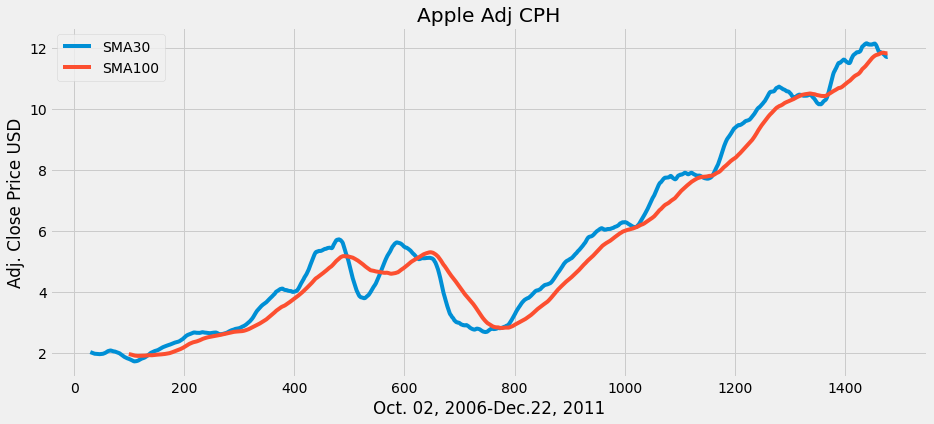

In [ ]:
#Visualising the data
plt.figure(figsize=(14,6))
plt.plot(SMA30['Adj Close'],label='SMA30')
plt.plot(SMA100['Adj Close'],label='SMA100')
plt.title('Apple Adj CPH')
plt.xlabel('Oct. 02, 2006-Dec.22, 2011')
plt.ylabel('Adj. Close Price USD')
plt.legend(loc='upper left')
plt.show()



In [ ]:
#Creating a new data frame to store the data to be processed 
maindata=pd.DataFrame()
maindata['AAPL']=AAPL['Adj Close']
maindata['SMA30']=SMA30['Adj Close']
maindata['SMA100']=SMA100['Adj Close']
maindata[30:200]

,AAPL,SMA30,SMA100
30,1.814698,2.024618,NaN
31,1.790303,2.018520,NaN
32,1.900690,2.013122,NaN
33,1.913498,2.006546,NaN
34,1.912584,1.998566,NaN
...,...,...,...
195,2.617909,2.433238,2.151260
196,2.636816,2.445273,2.159646
197,2.701768,2.460306,2.169200
198,2.753913,2.477668,2.179067


In [ ]:
#CREATING THE SMA INDICATOR TO GENERATE BUY AND SELL SIGNAL
def buy_sell_signal(maindata):
  signalbuyprice = []
  signalsellprice = []
  flag=-1

  for i in range(len(maindata)):
    if maindata['SMA30'][i]>maindata['SMA100'][i]:
      if flag!=1:
        signalbuyprice.append(maindata['AAPL'][i])
        signalsellprice.append(np.nan)
        flag=1
      else:
        signalbuyprice.append(np.nan)
        signalsellprice.append(np.nan)
    elif maindata['SMA30'][i]<maindata['SMA100'][i]:
      if flag!=0:
        signalbuyprice.append(np.nan)
        signalsellprice.append(maindata['AAPL'][i])
        flag=0
      else:
        signalbuyprice.append(np.nan)
        signalsellprice.append(np.nan)
    else:
        signalbuyprice.append(np.nan)
        signalsellprice.append(np.nan)

  return (signalbuyprice,signalsellprice)





In [ ]:
buy_sell=buy_sell_signal(maindata)
maindata['buy_price']=buy_sell[0]
maindata['sell_price']=buy_sell[1]
maindata

,AAPL,SMA30,SMA100,buy_price,sell_price
0,2.052551,NaN,NaN,NaN,NaN
1,1.973266,NaN,NaN,NaN,NaN
2,2.062614,NaN,NaN,NaN,NaN
3,2.110794,NaN,NaN,NaN,NaN
4,2.151961,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1474,11.618826,11.729913,11.822190,NaN,NaN
1475,11.655111,11.711586,11.819260,NaN,NaN
1476,12.074098,11.707744,11.820928,NaN,NaN
1477,12.089346,11.697803,11.820836,NaN,NaN


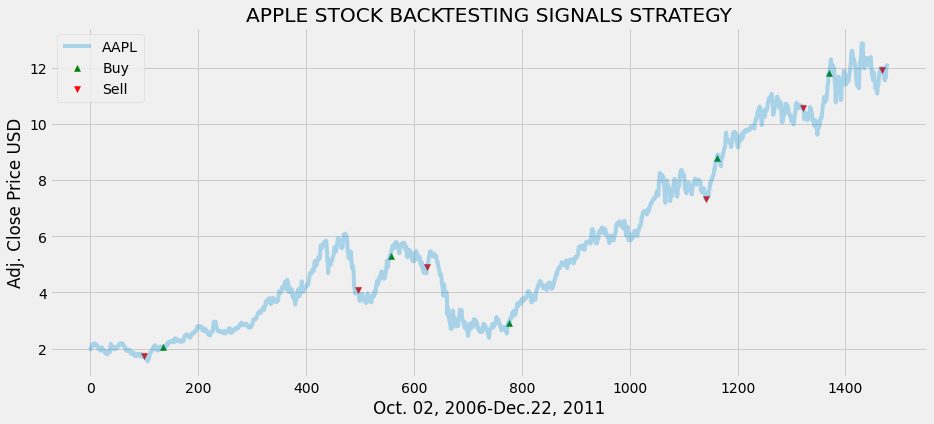

In [ ]:
#visualising the signals
plt.figure(figsize=(14.0,6.0))
plt.plot(maindata['AAPL'],label='AAPL',alpha=0.3)
plt.scatter(maindata.index,maindata['buy_price'],label='Buy',marker='^',color='green')
plt.scatter(maindata.index,maindata['sell_price'],label='Sell',marker='v',color='red')
plt.title('APPLE STOCK BACKTESTING SIGNALS STRATEGY')
plt.xlabel('Oct. 02, 2006-Dec.22, 2011')
plt.ylabel('Adj. Close Price USD')
plt.legend(loc='upper left')
plt.show()

